In [ ]:
## Major Project Contributing Members (Group-4 : Ankit Vashisht,Parvathy Arun,Anjali Pilakat and Abinaya Ashok  )

In [21]:
## Importing required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Data loading and Preprocessing

In [3]:
Wine_Data  = pd.read_csv("D:/Corizo Internship/Major Project Dataset (Wine Classification)_CSV.csv")

In [4]:
Wine_Data.shape

(1599, 12)

In [9]:
missing_values = Wine_Data.isnull().sum()
print(missing_values)


total_missing = Wine_Data.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64
Total missing values in the dataset: 3


In [14]:
Wine_Data['quality'].fillna(Wine_Data['quality'].mean(), inplace=True)
Wine_Data['total sulfur dioxide'].fillna(Wine_Data['total sulfur dioxide'].mean(), inplace=True)
Wine_Data['pH'].fillna(Wine_Data['pH'].mean(), inplace=True)

In [15]:
missing_values = Wine_Data.isnull().sum()
print(missing_values)


total_missing = Wine_Data.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total missing values in the dataset: 0


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Wine_Data.drop('quality', axis=1))

In [26]:
Wine_Data_df = pd.DataFrame(X_scaled, columns = Wine_Data.columns[:-1])

##  Exploratory Data Analysis(EDA)

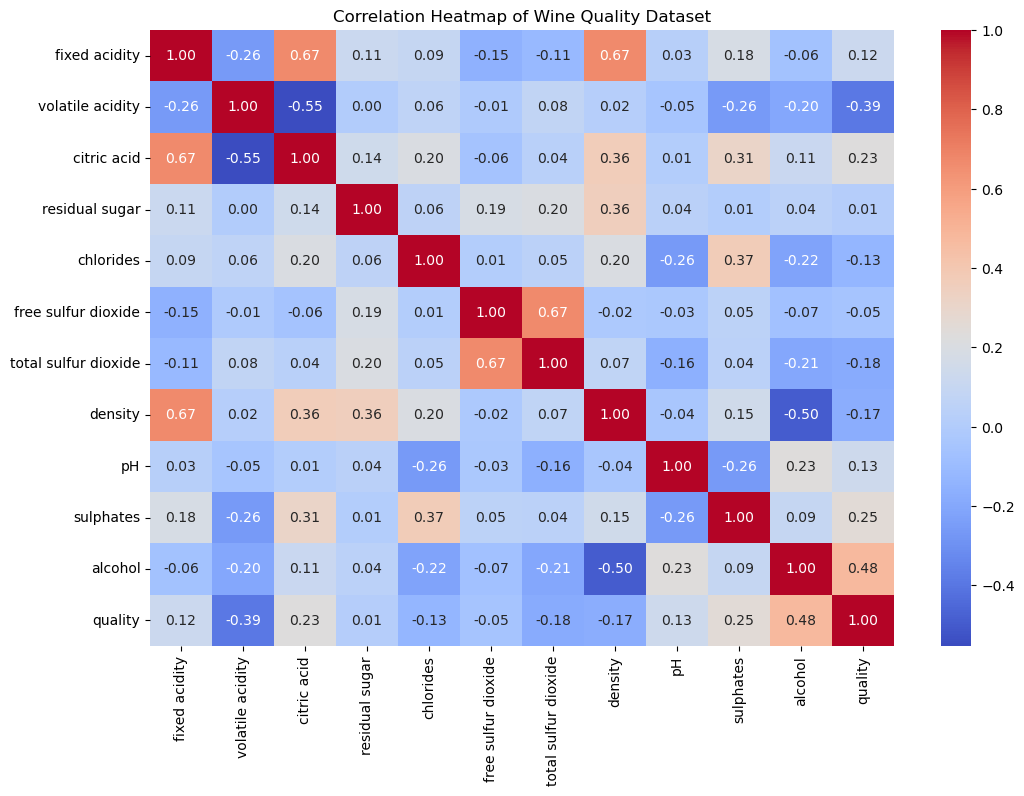

In [30]:
# Correlation heatmap to see relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(Wine_Data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Quality Dataset')
plt.show()


## Feature Engineering, Model Building and Evaluation

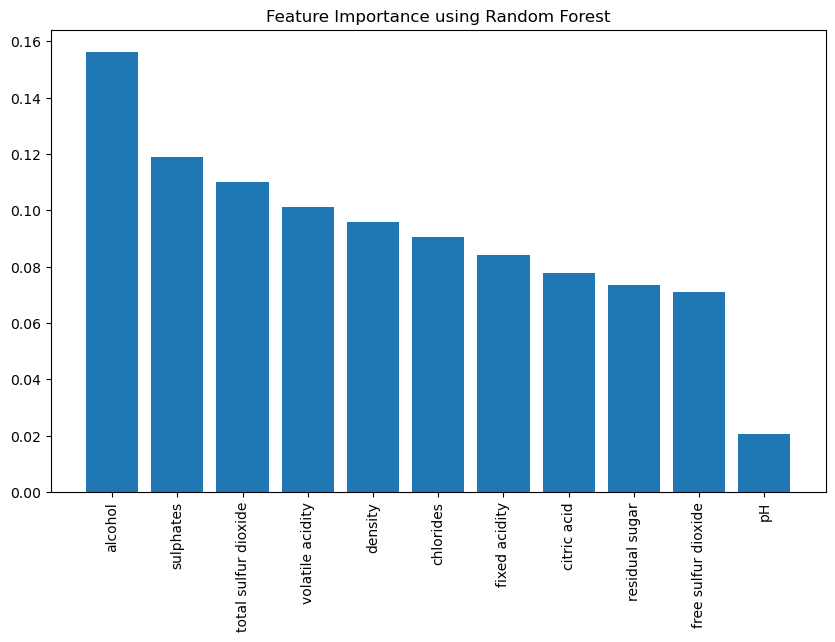

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into features and target
X = Wine_Data.drop('quality', axis=1)
y = Wine_Data['quality']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model to see feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Getting feature importance
importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)
plt.title('Feature Importance using Random Forest')
plt.show()

In [62]:
## Feature rankings

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. feature 10 (0.1562454756307656)
2. feature 9 (0.11909567186433423)
3. feature 6 (0.11019979902408075)
4. feature 1 (0.10117532416195678)
5. feature 7 (0.09600448405786008)
6. feature 4 (0.09046976067854187)
7. feature 0 (0.0841494612025808)
8. feature 2 (0.07775133698258896)
9. feature 3 (0.07342945663587672)
10. feature 5 (0.07086675545392046)
11. feature 8 (0.02061247430749376)


In [63]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Defining features and target variable
X = Wine_Data.drop('quality', axis=1)  # Features (all columns except 'quality')
y = Wine_Data['quality']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Initial Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_initial = rf.predict(X_test)

# Calculate accuracy before tuning
initial_accuracy = accuracy_score(y_test, y_pred_initial) * 100
print(f"Initial Accuracy: {initial_accuracy:.2f}%")
print("Initial Classification Report:\n", classification_report(y_test, y_pred_initial))
print("Initial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_initial))

# Step 2: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Step 3: Fit the model with the best parameters
best_model = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)

best_model.fit(X_train, y_train)

# Predictions with the best model
y_pred_best = best_model.predict(X_test)

# Calculate accuracy after tuning
best_accuracy = accuracy_score(y_test, y_pred_best) * 100
print(f"Best Model Accuracy: {best_accuracy:.2f}%")
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Initial Accuracy: 65.62%
Initial Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.76      0.73       129
           6       0.62      0.69      0.65       133
           7       0.67      0.48      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320

Initial Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 98 31  0  0]
 [ 0  0 36 92  5  0]
 [ 0  0  0 21 20  1]
 [ 0  0  0  0  5  0]]


C:\Users\Ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 65.31%
Best Model Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.75      0.73       129
           6       0.62      0.69      0.65       133
           7       0.62      0.48      0.54        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.62      0.65      0.64       320

Best Model Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 97 32  0  0]
 [ 0  0 34 92  7  0]
 [ 0  0  0 21 20  1]
 [ 0  0  0  0  5  0]]


C:\Users\Ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
